# Recommendation System Using K-NN

This project uses the K-NN algorithm to recommend movies based on a random movie picked from the dataset.
The data is explored and adjusted to fit the algorithm, taking only relevant movies, with 50 ratings or more.

The data directory:
movies.csv
    - movieId
    - title
    - genres
ratings.csv
    - userId
    - movieId
    - rating

The data can be downloaded in: http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

In [1]:
import pandas as pd
import numpy as np

In [2]:
movies = pd.read_csv('data/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings = pd.read_csv('data/ratings.csv')
ratings = ratings.drop(['timestamp'], axis=1)
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


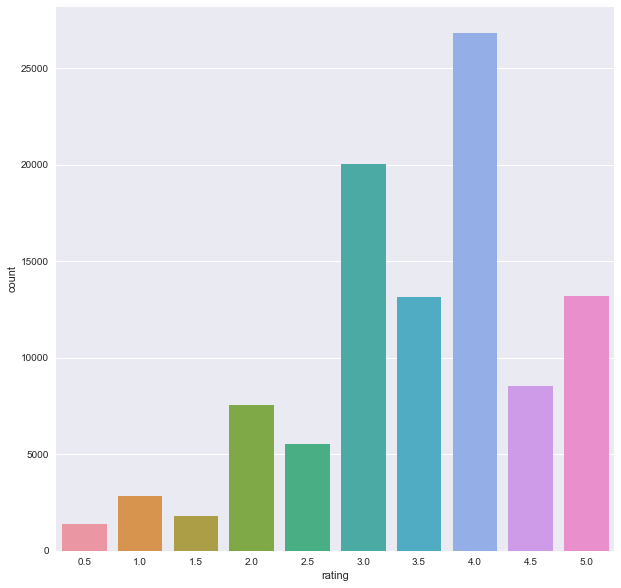

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,10))
sns.countplot(x="rating", data=ratings)

In [5]:
rating_count = pd.DataFrame(ratings.groupby('movieId')['rating'].count())
rating_count.sort_values('rating', ascending=False).head()

,rating
movieId,
356,329
318,317
296,307
593,279
2571,278


In [6]:
movieIds = [356, 318, 296, 593, 2571]

most_rated_movies = pd.DataFrame(movieIds, index=np.arange(5), columns=['movieId'])
most_rated_movies

,movieId
0,356
1,318
2,296
3,593
4,2571


In [7]:
most_rated_movies = pd.merge(most_rated_movies, movies, on='movieId')
most_rated_movies

,movieId,title,genres
0,356,Forrest Gump (1994),Comedy|Drama|Romance|War
1,318,"Shawshank Redemption, The (1994)",Crime|Drama
2,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
4,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [8]:
average_rating = pd.DataFrame(ratings.groupby('movieId')['rating'].mean())
average_rating['ratingCount'] = pd.DataFrame(ratings.groupby('movieId')['rating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

,rating,ratingCount
movieId,,
356,4.164134,329
318,4.429022,317
296,4.197068,307
593,4.161290,279
2571,4.192446,278


C:\Users\Travi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


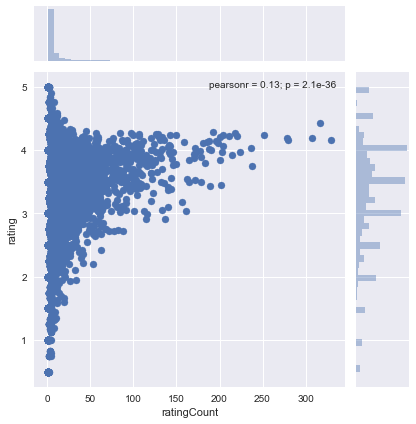

In [9]:
sns.jointplot(x=average_rating["ratingCount"], y=average_rating["rating"], kind='scatter')

In [10]:
combine_movie_rating = pd.merge(ratings, movies, on='movieId')
combine_movie_rating = combine_movie_rating.drop(['genres'], axis=1)
combine_movie_rating.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


In [11]:
# Remove rows where movie title is missing
combine_movie_rating = combine_movie_rating.dropna(axis = 0, subset = ['title'])

In [12]:
# Count the movie ratings
movie_ratingCount = (combine_movie_rating.
     groupby(by = ['title'])['rating'].
     count().
     reset_index().
     rename(columns = {'rating': 'ratingCount'})
     [['title', 'ratingCount']]
    )
movie_ratingCount.head()

,title,ratingCount
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


In [13]:
# Merge the ratingCount and movie title with movieId and userID
rating_and_ratingCount = combine_movie_rating.merge(movie_ratingCount, left_on = 'title', right_on = 'title', how = 'left')
rating_and_ratingCount.head()

,userId,movieId,rating,title,ratingCount
0,1,1,4.0,Toy Story (1995),215
1,5,1,4.0,Toy Story (1995),215
2,7,1,4.5,Toy Story (1995),215
3,15,1,2.5,Toy Story (1995),215
4,17,1,4.5,Toy Story (1995),215


In [14]:
# Describe the distribution of the rating movie count
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(movie_ratingCount['ratingCount'].describe())

count   9719.000
mean      10.375
std       22.406
min        1.000
25%        1.000
50%        3.000
75%        9.000
max      329.000
Name: ratingCount, dtype: float64


In [15]:
# Chose only movies with 9 ratings or more
low_popularity_boundary = 50
rating_popular_movies = rating_and_ratingCount.query('ratingCount >= @low_popularity_boundary')
rating_popular_movies.head()

,userId,movieId,rating,title,ratingCount
0,1,1,4.000,Toy Story (1995),215
1,5,1,4.000,Toy Story (1995),215
2,7,1,4.500,Toy Story (1995),215
3,15,1,2.500,Toy Story (1995),215
4,17,1,4.500,Toy Story (1995),215


In [16]:
rating_popular_movies.shape

(41362, 5)

In [17]:
rating_popular_movies_pivot = rating_popular_movies.pivot_table(index = 'title', columns = 'userId', values = 'rating').fillna(0)

In [18]:
rating_popular_movies_pivot.head(10)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,3.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000
12 Angry Men (1957),0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,...,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2001: A Space Odyssey (1968),0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,...,0.000,0.000,5.000,0.000,0.000,5.000,0.000,3.000,0.000,4.500
28 Days Later (2002),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.500,0.000,5.000
300 (2007),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,...,0.000,0.000,0.000,0.000,3.000,0.000,0.000,5.000,0.000,4.000
"40-Year-Old Virgin, The (2005)",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.500
A.I. Artificial Intelligence (2001),0.000,0.000,0.000,0.000,0.000,0.000,4.500,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,1.000,3.500,0.000,4.500,0.000,3.500
"Abyss, The (1989)",4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,3.000,0.000,4.000
Ace Ventura: Pet Detective (1994),0.000,0.000,0.000,0.000,3.000,3.000,0.000,0.000,0.000,0.000,...,0.000,2.000,0.000,2.000,0.000,0.000,0.000,3.500,0.000,3.000


In [19]:
print("Number of movies:",rating_popular_movies_pivot.shape[0])
print("Number of users:",rating_popular_movies_pivot.shape[1])

Number of movies: 450
Number of users: 606


In [20]:
from scipy.sparse import csr_matrix
rating_popular_movies_matrix = csr_matrix(rating_popular_movies_pivot.values)

Sparse matrices can be used in arithmetic operations: they support addition, subtraction, multiplication, division, and matrix power.

Read more: https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html

In [21]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(rating_popular_movies_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. The cosine of 0° is 1, and it is less than 1 for any angle in the interval (0,π] radians. It is thus a judgment of orientation and not magnitude: two vectors with the same orientation have a cosine similarity of 1, two vectors oriented at 90° relative to each other have a similarity of 0, and two vectors diametrically opposed have a similarity of -1, independent of their magnitude. The cosine similarity is particularly used in positive space, where the outcome is neatly bounded in [0,1]. The name derives from the term "direction cosine": in this case, unit vectors are maximally "similar" if they're parallel and maximally "dissimilar" if they're orthogonal (perpendicular). This is analogous to the cosine, which is unity (maximum value) when the segments subtend a zero angle and zero (uncorrelated) when the segments are perpendicular.

More info: https://en.wikipedia.org/wiki/Cosine_similarity

In computer science, brute-force search or exhaustive search, also known as generate and test, is a very general problem-solving technique and algorithmic paradigm that consists of systematically enumerating all possible candidates for the solution and checking whether each candidate satisfies the problem's statement.

More info: https://en.wikipedia.org/wiki/Brute-force_search

In [28]:
random_movie = np.random.choice(rating_popular_movies_pivot.shape[0])

In [29]:
# Gets the distances and indices from the neighbors
# Returns the distance and the index of the movie row
distances, indices = model_knn.kneighbors(rating_popular_movies_pivot.iloc[random_movie, :].reshape(1, -1), n_neighbors = 6)

C:\Users\Travi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


reshape(1, -1) -> https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape

kneighbors([X, n_neighbors, return_distance]) -> Finds the K-neighbors of a point.

In [30]:
# Cosine similarity between the random movie and its neighbors
distances

array([[3.33066907e-16, 1.17720801e-01, 1.25868036e-01, 3.25767014e-01,
        3.74456334e-01, 3.76133699e-01]])

In [31]:
# Indeces of the movie rows
indices

array([[252, 251, 250, 308, 264, 213]], dtype=int64)

In [32]:
# Random movie title
rating_popular_movies_pivot.index[indices.flatten()[0]]

'Lord of the Rings: The Two Towers, The (2002)'

In [33]:
# Print the random movie title, its recommendations and the distances
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(rating_popular_movies_pivot.index[random_movie]))
    else:
        print('{0}: {1}, with distance of {2}'.format(i, rating_popular_movies_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Lord of the Rings: The Two Towers, The (2002):

1: Lord of the Rings: The Return of the King, The (2003), with distance of 0.11772080067340107
2: Lord of the Rings: The Fellowship of the Ring, The (2001), with distance of 0.12586803568539462
3: Pirates of the Caribbean: The Curse of the Black Pearl (2003), with distance of 0.32576701363335414
4: Matrix, The (1999), with distance of 0.37445633407210877
5: Incredibles, The (2004), with distance of 0.3761336992314416


People who like The Two Towers will also like The Fellowship of the Ring and the Return of the King? Makes sense to me!

Pirates of the Caribbean is associated with the Lord of the Rings triology on [`IMDB`](https://www.imdb.com/title/tt0325980/)

The same thing for [`Matrix`](https://www.imdb.com/title/tt0133093/?ref_=tt_rec_tt).

The Incredibles is related to other animation family movies, but the correlation is valid because all these movies are critical acclaimed popular movies from the earlies 00's or late 90's (Matrix).

The Recommendation System seems to work fine and give precise recommendations!